Desafio Audset

O propósito do desafio é dividido em 3 fases.

Os insumos estão na pasta IMAGENS_PLANET e no arquivo gleba01.geojson, assim como os requirements no arquivo requirements.txt

Primeira fase é calcular o NDVI de cada imagem e salvar o índice na imagem processada.

In [108]:
import rasterio
import numpy

from rasterio.plot import show
from os import path

DATA_FOLDER = 'IMAGENS_PLANET'
image_file = path.join(DATA_FOLDER, '20180113_130423_103a.tif')
src = rasterio.open(image_file)
#Número de Bandas
src.count

4

In [109]:
#B1: Azul; B2: Verde; B3: Vermelho; B4: Infravermelho próximo
src.read_masks(1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [110]:
band_red = src.read(3)
band_red.shape


(765, 727)

In [111]:
band_nir = src.read(4)
band_nir.shape

(765, 727)

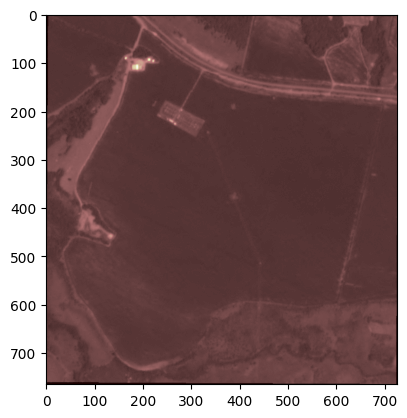

In [112]:
from matplotlib import pyplot
pyplot.imshow(band_red, cmap='pink')
pyplot.show()

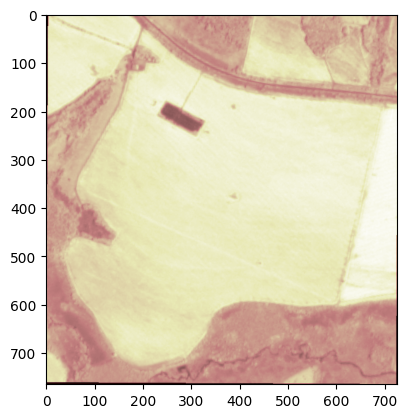

In [113]:
pyplot.imshow(band_nir, cmap='pink')
pyplot.show()

In [114]:
#Calcular NDVI
# Allow division by zero
numpy.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)
ndvi.shape

(765, 727)

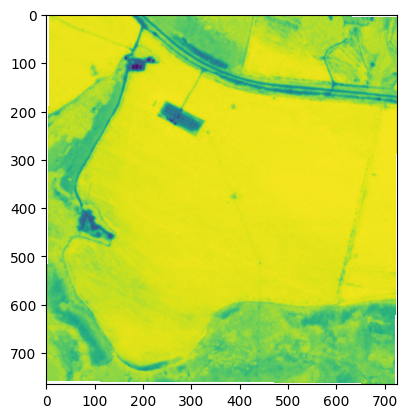

In [115]:
pyplot.imshow(ndvi, cmap='viridis')
pyplot.show()

In [116]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Create the file
with rasterio.open('ndvi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

In [117]:
import matplotlib.pyplot as plt
plt.imsave("ndvi_cmap.png", ndvi, cmap=plt.cm.summer)

In [ ]:
processed